<a href="https://colab.research.google.com/github/SantanaLucas1234/limpeza_e_cluster/blob/main/ETL%2BCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extração e limpeza dos dados

In [2]:
!pip install kneed

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from kneed import KneeLocator


df=pd.read_csv("/content/shopping_trends.csv")
df.head(1)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly


In [3]:
#Renomear colunas
df = df.rename(columns={"Customer ID":"id_cliente",
                        "Age" : "idade",
                        "Gender" : "sexo",
                         "Item Purchased" : "item_comprado",
                         "Category" : "categoria",
                         "Purchase Amount (USD)" : "valor_compra",
                         "Location" : "localizacao",
                         "Size" : "tamanho",
                         "Color" : "cor",
                         "Season" : "temporada",
                         "Review Rating" : "classificacao",
                         "Subscription Status" : "status_assinatura",
                         "Payment Method" : "metodo_pagamento",
                         "Shipping Type" : "tipo_envio",
                        "Discount Applied":"desconto_aplicado",
                         "Promo Code Used":"codigo_promocional_usado",
                         "Previous Purchases":"compras_anteriores",
                         "Preferred Payment Method":"metodo_de_pagamento_preferido",
                         "Frequency of Purchases":"frequencia de compras",})

In [4]:
df.describe()

,id_cliente,idade,valor_compra,classificacao,compras_anteriores
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [5]:
df.isnull().sum()

,0
id_cliente,0
idade,0
sexo,0
item_comprado,0
categoria,0
valor_compra,0
localizacao,0
tamanho,0
cor,0
temporada,0


In [6]:
df.duplicated().sum()

0

<Axes: xlabel='idade', ylabel='Count'>

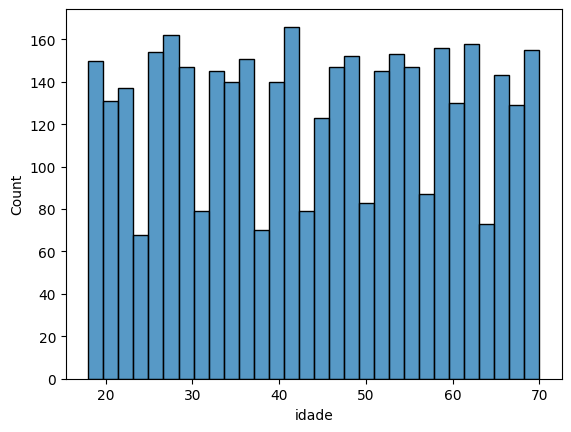

In [7]:
sns.histplot(df["idade"], bins=30)

In [34]:
df['id_cliente'].value_counts()

id_cliente
1       False
2621    False
2593    False
2594    False
2595    False
        ...  
1305    False
1306    False
1307    False
1308    False
3900    False
Name: count, Length: 3900, dtype: bool


# Agrupar clientes por padrão de gasto, frequência de compras e dados demográficos

In [9]:
x = df[["localizacao", "frequencia de compras","categoria", "idade","sexo", "temporada", "desconto_aplicado"]]
x.head(-1)

,localizacao,frequencia de compras,categoria,idade,sexo,temporada,desconto_aplicado
0,Kentucky,Fortnightly,Clothing,55,Male,Winter,Yes
1,Maine,Fortnightly,Clothing,19,Male,Winter,Yes
2,Massachusetts,Weekly,Clothing,50,Male,Spring,Yes
3,Rhode Island,Weekly,Footwear,21,Male,Spring,Yes
4,Oregon,Annually,Clothing,45,Male,Spring,Yes
...,...,...,...,...,...,...,...
3894,Connecticut,Every 3 Months,Clothing,66,Female,Spring,No
3895,Virginia,Weekly,Clothing,40,Female,Summer,No
3896,Iowa,Bi-Weekly,Accessories,52,Female,Spring,No
3897,New Jersey,Quarterly,Accessories,46,Female,Spring,No





## Converter dados categóricos em numéricos

In [10]:
x['desconto_aplicado'] = x['desconto_aplicado'].map({"Yes":1, "No":0})
x.head(-1)

<ipython-input-10-cb4f96e211f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['desconto_aplicado'] = x['desconto_aplicado'].map({"Yes":1, "No":0})


,localizacao,frequencia de compras,categoria,idade,sexo,temporada,desconto_aplicado
0,Kentucky,Fortnightly,Clothing,55,Male,Winter,1
1,Maine,Fortnightly,Clothing,19,Male,Winter,1
2,Massachusetts,Weekly,Clothing,50,Male,Spring,1
3,Rhode Island,Weekly,Footwear,21,Male,Spring,1
4,Oregon,Annually,Clothing,45,Male,Spring,1
...,...,...,...,...,...,...,...
3894,Connecticut,Every 3 Months,Clothing,66,Female,Spring,0
3895,Virginia,Weekly,Clothing,40,Female,Summer,0
3896,Iowa,Bi-Weekly,Accessories,52,Female,Spring,0
3897,New Jersey,Quarterly,Accessories,46,Female,Spring,0


In [11]:
x['temporada'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [12]:
x['temporada'] = x['temporada'].map({"Summer":0, "Fall":1, "Winter":2, "Spring":3})
x.head(-1)

<ipython-input-12-b89b5258f236>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['temporada'] = x['temporada'].map({"Summer":0, "Fall":1, "Winter":2, "Spring":3})


,localizacao,frequencia de compras,categoria,idade,sexo,temporada,desconto_aplicado
0,Kentucky,Fortnightly,Clothing,55,Male,2,1
1,Maine,Fortnightly,Clothing,19,Male,2,1
2,Massachusetts,Weekly,Clothing,50,Male,3,1
3,Rhode Island,Weekly,Footwear,21,Male,3,1
4,Oregon,Annually,Clothing,45,Male,3,1
...,...,...,...,...,...,...,...
3894,Connecticut,Every 3 Months,Clothing,66,Female,3,0
3895,Virginia,Weekly,Clothing,40,Female,0,0
3896,Iowa,Bi-Weekly,Accessories,52,Female,3,0
3897,New Jersey,Quarterly,Accessories,46,Female,3,0


In [13]:
x["categoria"].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [14]:
x['categoria'] = x['categoria'].map({"Clothing":0, "Footwear":1, "Outerwear":2, "Accessories":3})
x.head(-1)

<ipython-input-14-723ba265c107>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['categoria'] = x['categoria'].map({"Clothing":0, "Footwear":1, "Outerwear":2, "Accessories":3})


,localizacao,frequencia de compras,categoria,idade,sexo,temporada,desconto_aplicado
0,Kentucky,Fortnightly,0,55,Male,2,1
1,Maine,Fortnightly,0,19,Male,2,1
2,Massachusetts,Weekly,0,50,Male,3,1
3,Rhode Island,Weekly,1,21,Male,3,1
4,Oregon,Annually,0,45,Male,3,1
...,...,...,...,...,...,...,...
3894,Connecticut,Every 3 Months,0,66,Female,3,0
3895,Virginia,Weekly,0,40,Female,0,0
3896,Iowa,Bi-Weekly,3,52,Female,3,0
3897,New Jersey,Quarterly,3,46,Female,3,0


In [15]:
x['frequencia de compras'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [16]:
x["frequencia de compras"] = x['frequencia de compras'].map({"Monthly":0, "Weekly":1,
                                                             "Fortnightly":2, "Annually" :3,
                                                             "Quarterly":4, "Bi-Weekly":5,
                                                             "Every 3 Months": 6 })
x.head(-1)

<ipython-input-16-f2e5d3f752c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["frequencia de compras"] = x['frequencia de compras'].map({"Monthly":0, "Weekly":1,


,localizacao,frequencia de compras,categoria,idade,sexo,temporada,desconto_aplicado
0,Kentucky,2,0,55,Male,2,1
1,Maine,2,0,19,Male,2,1
2,Massachusetts,1,0,50,Male,3,1
3,Rhode Island,1,1,21,Male,3,1
4,Oregon,3,0,45,Male,3,1
...,...,...,...,...,...,...,...
3894,Connecticut,6,0,66,Female,3,0
3895,Virginia,1,0,40,Female,0,0
3896,Iowa,5,3,52,Female,3,0
3897,New Jersey,4,3,46,Female,3,0


In [17]:
x["localizacao"].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [18]:
x['localizacao'] = x['localizacao'].map({"Kentucky":"Sul", "Maine":"Nordeste",
                                          "Massachusetts":"Nordeste", "Rhode Island":"Nordeste",
                                          "Oregon": "Oeste", "Wyoming": "Oeste",
                                          "Montana": "Oeste", "Louisiana":"Sul",
                                          "West Virginia":"Sul", "Missouri":"Centro-Oeste",
                                          "Arkansas":"Sul", "Delaware":"Sul",
                                          "New Hampshire":"Nordeste", "New York":"Nordeste",
                                          "Alabama":"Sul", "Mississippi":"Sul",
                                          "North Carolina":"Sul", "California": "Oeste",
                                          "Florida":"Sul", "Texas": "Oeste",
                                          "Nevada": "Oeste", "Kansas":"Centro-Oeste",
                                          "Colorado": "Oeste", "North Dakota":"Centro-Oeste",
                                          "Illinois":"Centro-Oeste", "Indiana":"Centro-Oeste",
                                          "Arizona": "Oeste", "Alaska":"Norte",
                                         "Tennessee":"Sul", "Ohio":"Centro-Oeste",
                                         "New Jersey":"Nordeste", "Maryland":"Sul",
                                         "Vermont":"Nordeste", "New Mexico": "Oeste",
                                         "South Carolina":"Sul", "Idaho": "Oeste",
                                         "Pennsylvania":"Nordeste", "Connecticut":"Nordeste",
                                         "Utah": "Oeste", "Virginia":"Sul",
                                         "Georgia":"Sul", "Nebraska":"Centro-Oeste",
                                         "Iowa":"Centro-Oeste", "South Dakota":"Centro-Oeste",
                                          "Minnesota":"Centro-Oeste", "Washington": "Oeste",
                                          "Wisconsin":"Centro-Oeste", "Michigan":"Centro-Oeste",
                                         "Hawaii":  "Oeste", "Oklahoma":  "Oeste"})

<ipython-input-18-6e5ea6d03198>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['localizacao'] = x['localizacao'].map({"Kentucky":"Sul", "Maine":"Nordeste",


In [19]:
x.head()

,localizacao,frequencia de compras,categoria,idade,sexo,temporada,desconto_aplicado
0,Sul,2,0,55,Male,2,1
1,Nordeste,2,0,19,Male,2,1
2,Nordeste,1,0,50,Male,3,1
3,Nordeste,1,1,21,Male,3,1
4,Oeste,3,0,45,Male,3,1


In [20]:
x["sexo"] = x["sexo"].map({"Female":0, "Male":1})
x['localizacao'] = x['localizacao'].map({"Sul":0,"Nordeste":1,"Oeste":2,"Centro-Oeste":3,"Norte":4})
x.head(-1)

<ipython-input-20-16394a65c387>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["sexo"] = x["sexo"].map({"Female":0, "Male":1})
<ipython-input-20-16394a65c387>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['localizacao'] = x['localizacao'].map({"Sul":0,"Nordeste":1,"Oeste":2,"Centro-Oeste":3,"Norte":4})


,localizacao,frequencia de compras,categoria,idade,sexo,temporada,desconto_aplicado
0,0,2,0,55,1,2,1
1,1,2,0,19,1,2,1
2,1,1,0,50,1,3,1
3,1,1,1,21,1,3,1
4,2,3,0,45,1,3,1
...,...,...,...,...,...,...,...
3894,1,6,0,66,0,3,0
3895,0,1,0,40,0,0,0
3896,3,5,3,52,0,3,0
3897,1,4,3,46,0,3,0


In [21]:
x.isnull().sum()

,0
localizacao,0
frequencia de compras,0
categoria,0
idade,0
sexo,0
temporada,0
desconto_aplicado,0


## Cluster

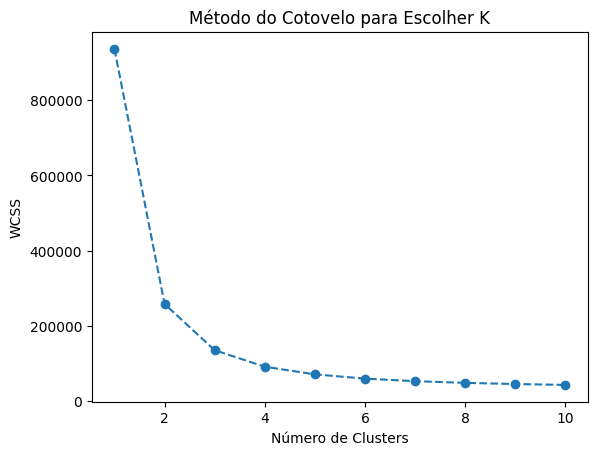

In [22]:
wcss = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker="o", linestyle="--")
plt.title("Método do Cotovelo para Escolher K")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.show()

In [23]:
knee = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print(f"O número ideal de clusters é: {knee.elbow}")

O número ideal de clusters é: 3


In [24]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster = kmeans.fit_predict(x)
x['cluster'] = cluster

<ipython-input-24-ff6ff7d7c62a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster'] = cluster


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

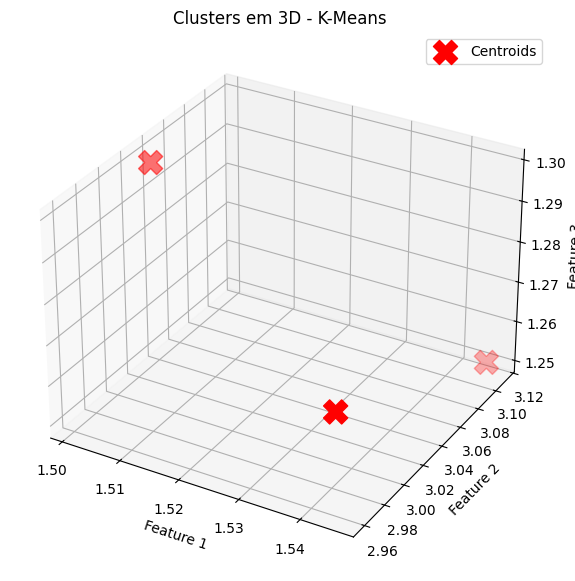

In [26]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Adicionar os centróides
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           s=300, c="red", marker="X", label="Centroids")

# Rótulos e título
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("Clusters em 3D - K-Means")
ax.legend()

plt.show()


In [27]:
labels = kmeans.labels_

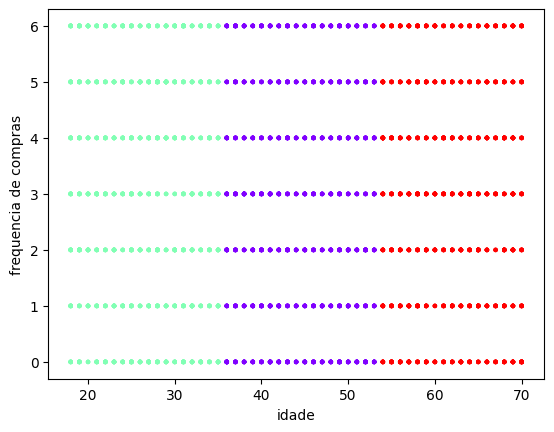

In [28]:
plt.scatter(x['idade'], x['frequencia de compras'],
            c=x["cluster"], s=5, cmap='rainbow')
plt.xlabel("idade")
plt.ylabel("frequencia de compras")
plt.show()

In [29]:
x.head()

,localizacao,frequencia de compras,categoria,idade,sexo,temporada,desconto_aplicado,cluster
0,0,2,0,55,1,2,1,2
1,1,2,0,19,1,2,1,1
2,1,1,0,50,1,3,1,0
3,1,1,1,21,1,3,1,1
4,2,3,0,45,1,3,1,0


In [30]:
cluster_summary = x.groupby("cluster").agg({
    "idade": lambda x: x.mode()[0],
    "frequencia de compras": lambda x: x.mode()[0],
    "localizacao" : lambda x: x.mode()[0],
    "sexo" : lambda x: x.mode()[0],
    "categoria" : lambda x: x.mode()[0],
    "temporada" : lambda x: x.mode()[0],
    "desconto_aplicado" : lambda x: x.mode()[0]

    })

In [31]:
cluster_summary["sexo"] = cluster_summary["sexo"].map({0:"Mulher", 1:"Homem"})
cluster_summary["temporada"] = cluster_summary["temporada"].map({0:"Verao", 1:"Outono", 2:"Inverno", 3:"Primavera"})
cluster_summary['desconto_aplicado'] = cluster_summary['desconto_aplicado'].map({1:"Sim", 0:"Nao"})
cluster_summary['categoria'] = cluster_summary['categoria'].map({0:"Roupas"})
cluster_summary["frequencia de compras"] = cluster_summary['frequencia de compras'].map({0:"Mensal", 1:"Semanal",
                                                                                         2:"Quinzenal", 3:"Anual" ,
                                                                                         5:"Trimestral", 5:"Quinzenal",
                                                                                         6:"A cada 3 meses" })
cluster_summary['localizacao'] = cluster_summary['localizacao'].map({0:"Sul",1:"Nordeste",2:"Oeste",3:"Centro-Oeste",4:"Norte"})



In [32]:
cluster_summary

,idade,frequencia de compras,localizacao,sexo,categoria,temporada,desconto_aplicado
cluster,,,,,,,
0,41,Mensal,Oeste,Homem,Roupas,Outono,Nao
1,25,A cada 3 meses,Sul,Homem,Roupas,Inverno,Nao
2,69,Anual,Sul,Homem,Roupas,Primavera,Nao
